# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.regularizers import l2,l1,l1_l2
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
#from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

In [204]:
df = pd.read_csv('./ML_Datasets-main/compresive_strength_concrete.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [206]:
df.describe(percentiles=[0.25,0.5,0.75,0.8,1])

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
80%,376.000000,163.180000,123.000000,195.500000,11.100000,1047.000000,845.000000,56.000000,50.514000
100%,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [207]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

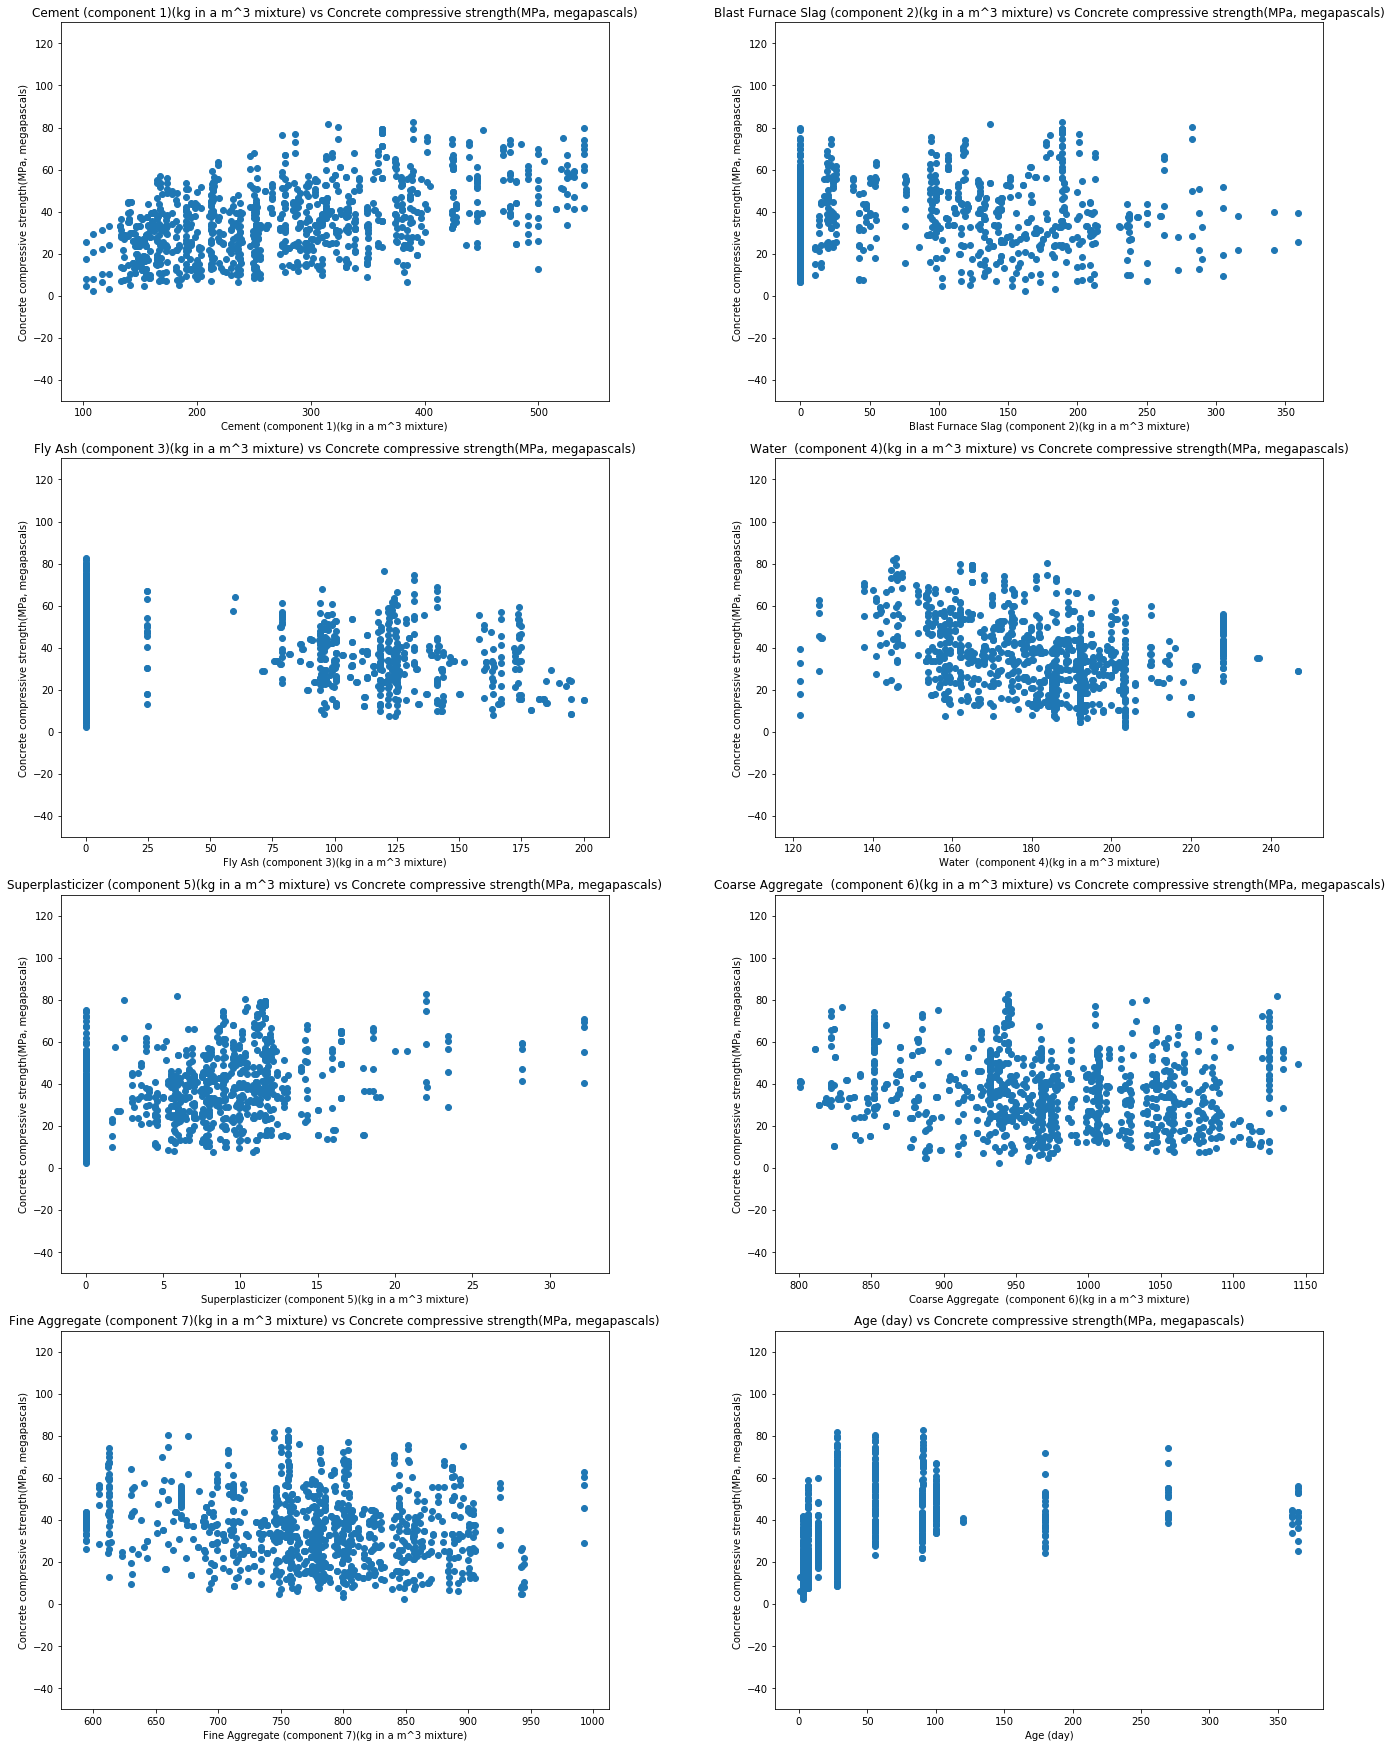

In [208]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['Concrete compressive strength(MPa, megapascals) '])
    plt.title(x+' vs Concrete compressive strength(MPa, megapascals)')
    plt.ylabel('Concrete compressive strength(MPa, megapascals)')
    plt.xlabel(x)
    plt.ylim(-50,130)

plt.figure(figsize=(20,30))

scatter('Cement (component 1)(kg in a m^3 mixture)', 1)
scatter('Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 2)
scatter('Fly Ash (component 3)(kg in a m^3 mixture)', 3)
scatter('Water  (component 4)(kg in a m^3 mixture)', 4)
scatter('Superplasticizer (component 5)(kg in a m^3 mixture)', 5)
scatter('Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 6)
scatter('Fine Aggregate (component 7)(kg in a m^3 mixture)',7)
scatter('Age (day)',8)
plt.tight_layout()

In [209]:
print(np.corrcoef(df['Cement (component 1)(kg in a m^3 mixture)'],df['Concrete compressive strength(MPa, megapascals) '])[1,0])
print(np.corrcoef(df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'],df['Concrete compressive strength(MPa, megapascals) '])[1,0])
print(np.corrcoef(df['Fly Ash (component 3)(kg in a m^3 mixture)'],df['Concrete compressive strength(MPa, megapascals) '])[1,0])
print(np.corrcoef(df['Water  (component 4)(kg in a m^3 mixture)'],df['Concrete compressive strength(MPa, megapascals) '])[1,0])
print(np.corrcoef(df['Superplasticizer (component 5)(kg in a m^3 mixture)'],df['Concrete compressive strength(MPa, megapascals) '])[1,0])
print(np.corrcoef(df['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'],df['Concrete compressive strength(MPa, megapascals) '])[1,0])
print(np.corrcoef(df['Fine Aggregate (component 7)(kg in a m^3 mixture)'],df['Concrete compressive strength(MPa, megapascals) '])[1,0])
print(np.corrcoef(df['Age (day)'],df['Concrete compressive strength(MPa, megapascals) '])[1,0])


0.4978319193241576
0.13482926149740498
-0.10575491629731357
-0.28963338498530455
0.3660788271885194
-0.16493461446010974
-0.16724124729005824
0.3288730007799875


df.drop(labels=['Fly Ash (component 3)(kg in a m^3 mixture)','Water  (component 4)(kg in a m^3 mixture)','Coarse Aggregate  (component 6)(kg in a m^3 mixture)','Fine Aggregate (component 7)(kg in a m^3 mixture)'],axis=1,inplace=True)

In [210]:
df = shuffle(df,random_state=150).astype('float32')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
926,162.000000,214.000000,164.000000,202.000000,10.0,820.000000,680.000000,28.0,30.650000
58,304.000000,76.000000,0.000000,228.000000,0.0,932.000000,670.000000,180.0,50.950001
225,168.000000,42.099998,163.800003,121.800003,5.7,1058.699951,780.099976,14.0,17.820000
381,315.000000,137.000000,0.000000,145.000000,5.9,1130.000000,745.000000,28.0,81.750000
461,167.399994,129.899994,128.600006,175.500000,7.8,1006.299988,746.599976,100.0,53.660000


In [211]:
train_data = df[:int(0.5*len(df))+1]
val_data = df[int(0.5*len(df))+1:int(0.7*len(df))+1]
test_data = df[int(0.7*len(df))+1:]
train_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
926,162.000000,214.000000,164.000000,202.000000,10.0,820.000000,680.000000,28.0,30.650000
58,304.000000,76.000000,0.000000,228.000000,0.0,932.000000,670.000000,180.0,50.950001
225,168.000000,42.099998,163.800003,121.800003,5.7,1058.699951,780.099976,14.0,17.820000
381,315.000000,137.000000,0.000000,145.000000,5.9,1130.000000,745.000000,28.0,81.750000
461,167.399994,129.899994,128.600006,175.500000,7.8,1006.299988,746.599976,100.0,53.660000
...,...,...,...,...,...,...,...,...,...
996,152.600006,238.699997,0.000000,200.000000,6.3,1001.799988,683.900024,28.0,26.860001
412,167.000000,75.400002,167.000000,164.000000,7.9,1007.299988,770.099976,3.0,15.520000
467,250.000000,0.000000,95.699997,191.800003,5.3,948.900024,857.200012,100.0,41.160000
617,254.000000,0.000000,0.000000,198.000000,0.0,968.000000,863.000000,3.0,9.310000


In [212]:
scaler = MinMaxScaler()
train_data[train_data.columns] = scaler.fit_transform(train_data[train_data.columns])
val_data[val_data.columns] = scaler.transform(val_data[val_data.columns])
test_data[test_data.columns] = scaler.transform(test_data[test_data.columns])

C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Program Files\Anaconda\lib\site-packages\pandas\core\frame.py:2966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Program Files\Anaconda\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [213]:
train_targets = train_data['Concrete compressive strength(MPa, megapascals) ']
train_data = train_data.drop('Concrete compressive strength(MPa, megapascals) ',axis=1)
val_targets = val_data['Concrete compressive strength(MPa, megapascals) ']
val_data = val_data.drop('Concrete compressive strength(MPa, megapascals) ',axis=1)
test_targets = test_data['Concrete compressive strength(MPa, megapascals) ']
test_data = test_data.drop('Concrete compressive strength(MPa, megapascals) ',axis=1)
train_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
926,0.136986,0.595437,0.819590,0.641087,0.310559,0.056723,0.215755,0.069061
58,0.461187,0.211464,0.000000,0.848921,0.000000,0.392857,0.190667,0.488950
225,0.150685,0.117140,0.818591,0.000000,0.177019,0.773109,0.466884,0.030387
381,0.486301,0.381191,0.000000,0.185452,0.183230,0.987095,0.378826,0.069061
461,0.149315,0.361436,0.642679,0.429257,0.242236,0.615846,0.382840,0.267956
...,...,...,...,...,...,...,...,...
996,0.115525,0.664162,0.000000,0.625100,0.195652,0.602341,0.225539,0.069061
412,0.148402,0.209794,0.834583,0.337330,0.245342,0.618847,0.441796,0.000000
467,0.337900,0.000000,0.478261,0.559552,0.164596,0.443578,0.660311,0.267956
617,0.347032,0.000000,0.000000,0.609113,0.000000,0.500900,0.674862,0.000000


In [214]:
train_data.shape[1]

8

In [215]:
def build_model():
    model = Sequential()
    model.add(Dense(16, activation='relu',input_shape=(train_data.shape[1],),kernel_regularizer=l2(0.01)))
    #model.add(Dropout(0.2))
    model.add(Dense(10, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(6, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(1,activation='tanh'))
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    return model

In [216]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

#num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
train_targets = np.asarray(train_targets)
val_data = np.asarray(val_data)
val_targets = np.asarray(val_targets)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [217]:
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs,verbose=1)

Train on 387 samples, validate on 129 samples
Epoch 1/100
387/387 [==============================] - 1s 3ms/sample - loss: 0.3805 - mae: 0.4651 - val_loss: 0.3319 - val_mae: 0.4117
Epoch 2/100
387/387 [==============================] - 0s 194us/sample - loss: 0.3266 - mae: 0.4087 - val_loss: 0.2970 - val_mae: 0.3724
Epoch 3/100
387/387 [==============================] - 0s 187us/sample - loss: 0.2923 - mae: 0.3718 - val_loss: 0.2658 - val_mae: 0.3373
Epoch 4/100
387/387 [==============================] - 0s 190us/sample - loss: 0.2589 - mae: 0.3337 - val_loss: 0.2335 - val_mae: 0.2973
Epoch 5/100
387/387 [==============================] - 0s 189us/sample - loss: 0.2252 - mae: 0.2924 - val_loss: 0.2020 - val_mae: 0.2587
Epoch 6/100
387/387 [==============================] - 0s 196us/sample - loss: 0.1931 - mae: 0.2528 - val_loss: 0.1731 - val_mae: 0.2229
Epoch 7/100
387/387 [==============================] - 0s 194us/sample - loss: 0.1652 - mae: 0.2173 - val_loss: 0.1503 - val_mae: 0.19

In [218]:
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

In [219]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [220]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history

[0.41173404,
 0.37240183,
 0.33732307,
 0.29727808,
 0.25872943,
 0.22293933,
 0.19687614,
 0.17797004,
 0.1696207,
 0.16578254,
 0.16296111,
 0.16034561,
 0.15862568,
 0.15388547,
 0.14990717,
 0.1465235,
 0.14390123,
 0.14041151,
 0.13716339,
 0.13471574,
 0.13275403,
 0.12982334,
 0.12776163,
 0.12477645,
 0.123559184,
 0.12046819,
 0.118809246,
 0.11710543,
 0.11569255,
 0.116866305,
 0.11487341,
 0.111797296,
 0.11349171,
 0.10998168,
 0.10881484,
 0.1101017,
 0.10674007,
 0.1062271,
 0.10606813,
 0.103988305,
 0.1030579,
 0.10263682,
 0.10122768,
 0.100416206,
 0.100888334,
 0.09802764,
 0.09853264,
 0.1019853,
 0.100769736,
 0.09777761,
 0.09704091,
 0.09498572,
 0.09880352,
 0.09684892,
 0.09430355,
 0.097890235,
 0.098500215,
 0.0946964,
 0.093835376,
 0.09565293,
 0.093721256,
 0.09068473,
 0.09114584,
 0.09044968,
 0.08908216,
 0.10753287,
 0.089346394,
 0.09128321,
 0.088421114,
 0.088967875,
 0.09107338,
 0.086752184,
 0.09105174,
 0.086103015,
 0.08799114,
 0.10811813,
 0

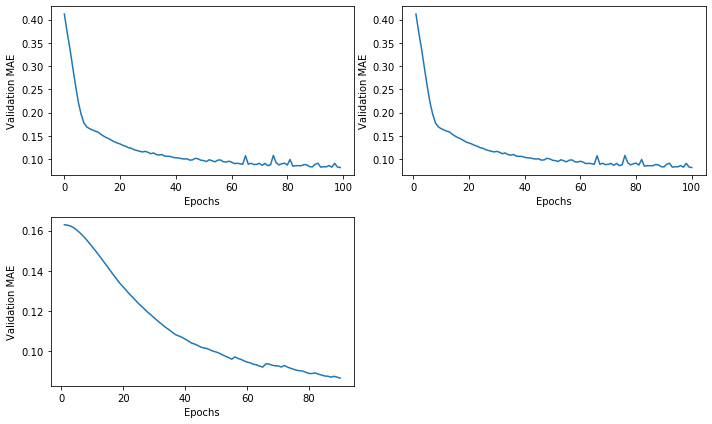

In [221]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.subplot(2,2,2)
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.subplot(2,2,3)
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.tight_layout()
plt.show()

In [223]:
def build_model1():
    model = Sequential()
    model.add(Dense(6, activation='relu',input_shape=(train_data.shape[1],),kernel_regularizer=l2(0.01)))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    return model

In [224]:
model = build_model1()
history = model.fit(train_data, train_targets,
          epochs=120, batch_size=64, verbose=1)
test_targets = np.asarray(test_targets)

Train on 516 samples
Epoch 1/120
516/516 [==============================] - 0s 461us/sample - loss: 0.3185 - mae: 0.4472
Epoch 2/120
516/516 [==============================] - 0s 41us/sample - loss: 0.3010 - mae: 0.4298
Epoch 3/120
516/516 [==============================] - 0s 41us/sample - loss: 0.2863 - mae: 0.4148
Epoch 4/120
516/516 [==============================] - 0s 43us/sample - loss: 0.2736 - mae: 0.4019
Epoch 5/120
516/516 [==============================] - 0s 43us/sample - loss: 0.2620 - mae: 0.3900
Epoch 6/120
516/516 [==============================] - 0s 43us/sample - loss: 0.2513 - mae: 0.3792
Epoch 7/120
516/516 [==============================] - 0s 41us/sample - loss: 0.2414 - mae: 0.3690
Epoch 8/120
516/516 [==============================] - 0s 43us/sample - loss: 0.2319 - mae: 0.3589
Epoch 9/120
516/516 [==============================] - 0s 47us/sample - loss: 0.2226 - mae: 0.3491
Epoch 10/120
516/516 [==============================] - 0s 43us/sample - loss: 0.2136 -

In [225]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

308/308 [==============================] - 0s 273us/sample - loss: 0.0179 - mae: 0.0913
